In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.environ["MUJOCO_GL"] = "egl"

from PIL import Image
import numpy as np
import asyncio
import requests
import time

from IPython import display

%matplotlib inline
import matplotlib.pyplot as plt

import metaworld
import random
from llava.constants import DEFAULT_IMAGE_TOKEN

from llserver.utils import put_task, get_task_result

In [5]:
env_name = 'pick-place-v2' # Pick an environment name
render_mode = 'rgb_array' # set a render mode

ml1 = metaworld.ML1(env_name) # Construct the benchmark, sampling tasks
camera_name = 'corner' # one of: ['corner', 'corner2', 'corner3', 'topview', 'behindGripper', 'gripperPOV']
env = ml1.train_classes[env_name](render_mode=render_mode, camera_name=camera_name)

task = random.choice(ml1.train_tasks)
env.set_task(task)  # Set task
obs = env.reset()  # Reset environment

In [6]:
for i in range(10):
    action = np.array([1, 0, 0, 0])
    (next_obs, reward, terminated, truncated, info) = env.step(action)


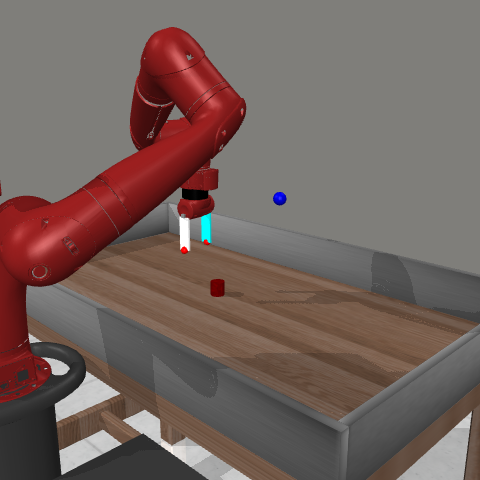

In [7]:
img1 = Image.fromarray(env.render()[::-1,::,::], 'RGB')
img1.save('metatmp1.png')
img1

In [11]:
prompt = f"""
You an action planner of a robot arm.
You are able to execute commands:
- move up
- move down
- move left
- move right
- move back
- move forward
- grasp object

You are provided with two images of a different state of execution.
Tell what commands were executed.
image 1: {DEFAULT_IMAGE_TOKEN} 
image 2: {DEFAULT_IMAGE_TOKEN}
"""
img_path = "/home/mpatratskiy/work/meta_world/src/data/"
task_response = put_task([img_path+"metatmp.png", img_path+"metatmp1.png"], prompt)
task_id = task_response.get("task_id")

In [19]:
task_id

'404906f3-b4c7-418d-a490-ca35daf71244'

In [12]:
result_response = get_task_result(task_id)
result_response

{'status': 'completed',
 'result': ["In the first image, the robot arm appears to be in a state of motion or transition. The gripper is open and positioned above what seems to be a workbench with various objects on it, including three cylindrical objects (two red and one blue) and two spherical objects (one red and one blue). The arm's orientation suggests it might have been moving towards the objects on the workbench but has not yet made contact or picked anything up.\n\nIn the second image, the robot arm is in a different configuration compared to the first image. The gripper is closed around a cylindrical object that is red, indicating that the robot has successfully grasped this item. The other objects on the workbench remain unchanged, with the blue spherical object still visible near the center of the workbench. The arm's position shows it has likely moved downwards to pick up the red cylinder after being in an extended position as seen in the first image.\n\nBased on these obser

In [1]:
import os
os.environ['HF_HOME'] = "/home/mpatratskiy/work/meta_world/llava_ckhp"

import asyncio
import uuid
from PIL import Image
import requests
import copy
import torch
import warnings
from llava.model.builder import load_pretrained_model
from llava.mm_utils import process_images, tokenizer_image_token
from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from llava.conversation import conv_templates

conv_template = "qwen_1_5"
question = "Hiii"  # Токены изображений уже содержатся в промпте
conv = copy.deepcopy(conv_templates[conv_template])
conv.append_message(conv.roles[0], question)
conv.append_message(conv.roles[1], None)
prompt_question = conv.get_prompt()

/home/mpatratskiy/miniconda3/envs/llama2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mpatratskiy/miniconda3/envs/llama2/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
conv_templates["qwen_1_5"]

Conversation(system='<|im_start|>system\nYou are a helpful assistant.', roles=('<|im_start|>user', '<|im_start|>assistant'), messages=[], offset=0, sep_style=<SeparatorStyle.CHATML: 5>, sep='<|im_end|>', sep2=None, version='qwen', tokenizer_id='', tokenizer=None, stop_str=None, stop_token_ids=None, skip_next=False)

In [8]:
print(prompt_question)

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
Hiii<|im_end|>
<|im_start|>assistant

